In [31]:
import warnings

import geopandas as gpd
import numpy as np
import momepy
import rioxarray
import xvec

from streetscape import StreetScape

In [32]:
warnings.filterwarnings(
    "ignore",
    category=RuntimeWarning,
    message="invalid value encountered in intersection",
)

In [33]:
streets = gpd.read_file("bubenec.gpkg", layer="streets").to_crs(5514)
buildings = gpd.read_file("bubenec.gpkg", layer="buildings").to_crs(5514)
plots = gpd.read_file("bubenec.gpkg", layer="plots").to_crs(5514)

In [34]:
gpd.list_layers("bubenec.gpkg")

,name,geometry_type
0,plots,Polygon
1,streets,LineString
2,buildings,Polygon


<Axes: >

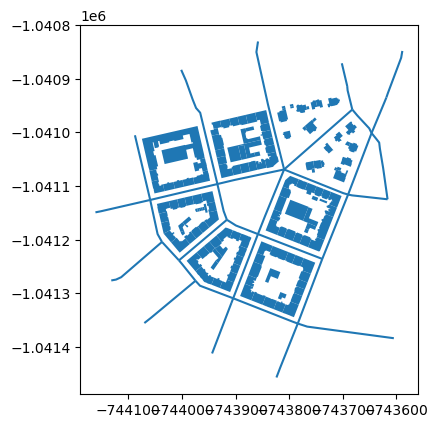

In [35]:
ax = streets.plot()
buildings.plot(ax=ax)

In [36]:
sc = Streetscape(streets, buildings)

In [37]:
sc.compute_sightline_indicators()

In [38]:
df = sc.sightline_indicators
df.head(2)

,uid,sight_line_points,left_OS_count,left_OS,left_SB_count,left_SB,left_H,left_HW,left_BUILT_COVERAGE,left_SEQ_SB_ids,...,right_SEQ_SB_categories,front_SB,back_SB,left_SEQ_OS_endpoints,right_SEQ_OS_endpoints,nodes_degree_1,nodes_degree_4,nodes_degree_3_5_plus,street_length,windingness
uid,,,,,,,,,,,,,,,,,,,,,
0,0,[POINT (-743682.3672524728 -1040957.4995517571...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[50.0, 50.0, 50.0, 50.0, 50.0, 23.978540643286...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 6.557430988391386, 1...","[133, 133, 134, 113, 113, 113, 113, 113, 114, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[300, 300, 300, 300, 300, 300, 300, 300, 300, ...","[300, 300, 300, 300, 300, 300, 300, 300, 300, ...","[POINT (-743649.358826546 -1040995.0554277), P...",[POINT (-743715.3756783996 -1040919.9436758142...,0.0,0.0,1.0,169.444816,0.000000
1,1,[POINT (-743691.4124446559 -1040913.867561322)...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],...,"[1, 1, 1, 1, 1]","[300, 300, 300, 300, 300, 300, 300, 300, 300, ...","[66.1494006769462, 63.014762926482504, 59.8801...",[POINT (-743641.6218142107 -1040909.2966620816...,[POINT (-743741.2030751011 -1040918.4384605625...,0.0,0.0,0.5,44.884929,0.001644


<Axes: >

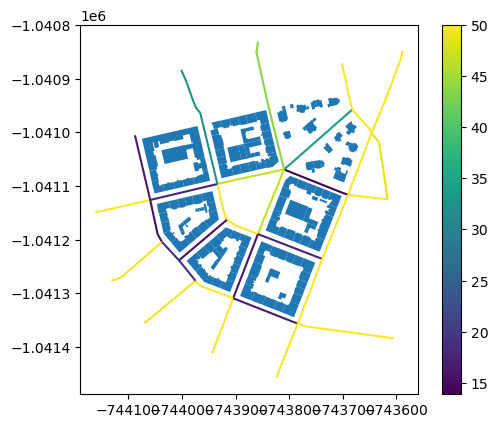

In [39]:
ax = sc.streets.plot(df.left_OS.apply(np.mean).values, legend=True)
buildings.plot(ax=ax)

<Axes: >

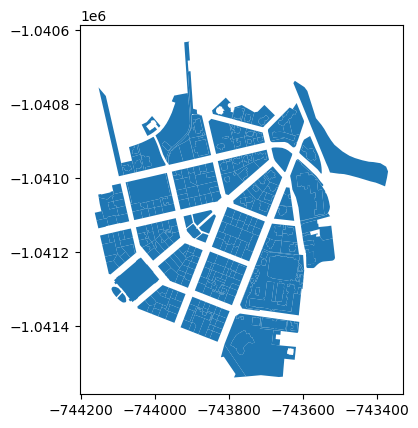

In [40]:
plots[plots.intersects(streets.union_all().envelope)].plot()

In [41]:
sc.compute_plot_indicators(plots)

In [42]:
df_plots = sc.plot_indicators
df_plots.head(2)

,uid,left_parcel_SB_count,left_parcel_SEQ_SB_ids,left_parcel_SEQ_SB,left_parcel_SEQ_SB_depth,right_parcel_SB_count,right_parcel_SEQ_SB_ids,right_parcel_SEQ_SB,right_parcel_SEQ_SB_depth
uid,,,,,,,,,
0,0,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[103, 103, 103, 103, 103, 103, 103, 103, 104, ...","[9.88393014474684, 9.874298146475384, 9.864666...","[40.24894258800112, 41.82368914849914, 36.8410...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[383, 383, 383, 383, 383, 383, 383, 383, 383, ...","[14.5694327036822, 10.08937470497476, 10.09945...","[19.240137542293866, 18.01382727194868, 15.660..."
1,1,"[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[385, 385, 385, 385, 385, 385, 385, 385, 385, ...","[8.472925356022218, 6.634230083327329, 6.39354...","[12.32268037246404, 14.300957903311469, 24.548...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[383, 383, 383, 383, 383, 383, 383, 383, 383, ...","[6.999993500914578, 7.026034888773269, 7.05207...","[31.996460086295624, 29.35684547713688, 15.856..."


/Users/martin/dev/uscuni/streetscape/.pixi/envs/default/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/martin/dev/uscuni/streetscape/.pixi/envs/default/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: >

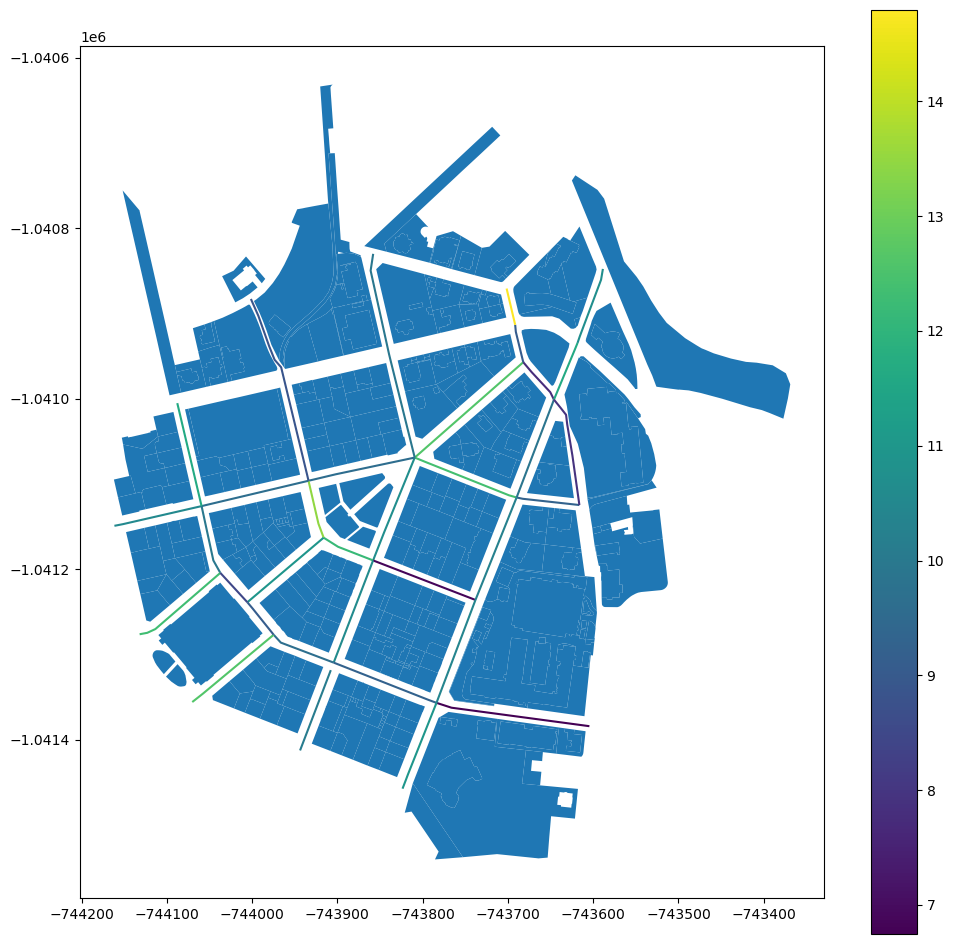

In [43]:
ax = sc.streets.plot(df_plots.right_parcel_SEQ_SB.apply(np.mean).values, legend=True, figsize=(12, 12))
plots.plot(ax=ax)

In [44]:
sc.compute_street_indicators()

In [45]:
street_df = sc.street_indicators
street_df.head(2)

,N,n_l,n_r,left_OS,right_OS,OS,left_OS_STD,right_OS_STD,OS_STD,left_OS_MAD,...,left_par_tot_15,right_par_tot_15,left_par_rel_15,right_par_rel_15,left_built_freq,right_built_freq,built_freq,left_built_coverage,right_built_coverage,built_coverage
uid,,,,,,,,,,,,,,,,,,,,,
0,57,28,38,33.607135,38.163914,71.771049,14.794107,12.059253,13.436283,13.873261,...,0.017857,0.0,0.037037,0.0,0.053115,0.053115,0.106229,0.185898,0.150816,0.168357
1,15,0,5,50.000000,40.362565,90.362565,0.000000,14.141433,9.825586,0.000000,...,0.000000,0.0,NaN,0.0,0.000000,0.022279,0.022279,0.000000,0.126976,0.063488


<Axes: >

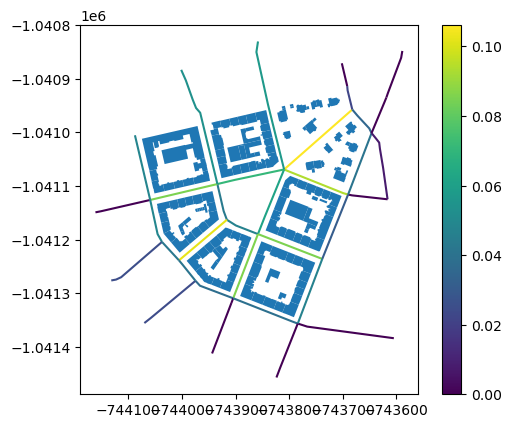

In [46]:
ax = sc.streets.plot(street_df["built_freq"].values, legend=True)
buildings.plot(ax=ax)

In [47]:
dtm = rioxarray.open_rasterio("bubenec.tif")

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

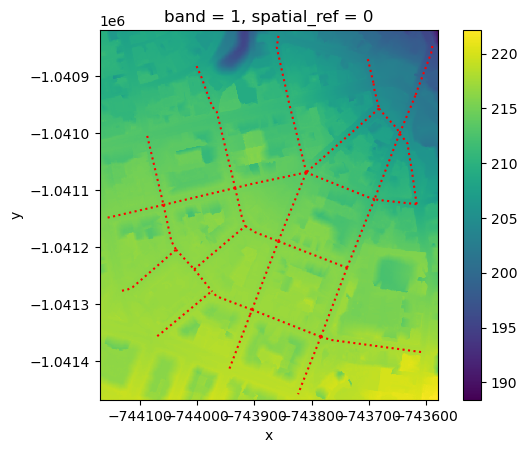

In [55]:
f, ax = plt.subplots()
dtm.plot(ax=ax)
streets.plot(ax=ax, color="red", zorder=20, linestyle="dotted")

In [52]:
sc.compute_slope(dtm.drop_vars("band"))

In [53]:
slope = sc.slope
slope.head()

,slope_degree,slope_percent,n_slopes,slope_valid
0,2.809318,0.049073,57,True
1,1.576886,0.027531,15,True
2,0.394064,0.006878,19,True
3,1.122029,0.019587,43,True
4,1.092165,0.019065,44,True


<Axes: >

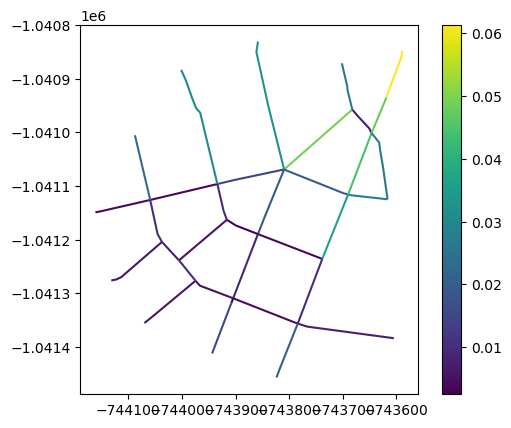

In [54]:
sc.streets.plot(slope.slope_percent.values, legend=True)
